In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ctes = pd.read_excel('ctes_final_new.xlsx') #Long data of patients, all the measurements and such
lab = pd.read_excel('laboratorio_final_new.xlsx') #Other, weirder long data?
pac = pd.read_excel('pac_covid.xlsx') #Patient basic info, ONE ROW PER PATIENT
pac["Dead"] = pac["fecha_fallece"].notna()


In [3]:
# ctes["Item__form_cte_"].unique()
# ctes["Item__form_cte_"].value_counts()
ctes["Etiqueta__form_cte_"].value_counts()


Etiqueta__form_cte_
presionarte    59107
saturaciono    50967
tiposaturac    48604
temperatura    43245
frecuenciac    33110
cantidadsat    29545
glucemia       19587
EscalaDolor    10452
frecuenciar     9099
espontanea      3919
deposicion      3134
PESO             159
TALLA             41
IMC               38
valorimc          37
Name: count, dtype: int64

In [4]:
# ctes[ctes["Etiqueta__form_cte_"]=="presionarte"]
ctes[ctes["Etiqueta__form_cte_"]=="valorimc"]["Valor__form_cte_"]

3403                    NaN
3472       Obesidad Grado I
4312     Obesidad Grado III
4568       Obesidad Grado I
4969              Normopeso
5106              Sobrepeso
5220              Sobrepeso
5351      Obesidad Grado II
5497     Obesidad Grado III
6548                    NaN
6761              Sobrepeso
6856              Normopeso
7131       Obesidad Grado I
7132              Sobrepeso
7137       Obesidad Grado I
7328              Normopeso
7329              Normopeso
8011              Normopeso
8012              Sobrepeso
8028              Sobrepeso
8899              Sobrepeso
9913              Normopeso
9914              Normopeso
10737             Normopeso
11057             Sobrepeso
11282     Peso Insuficiente
11301      Obesidad Grado I
11711             Sobrepeso
11927      Obesidad Grado I
12077             Normopeso
12163     Obesidad Grado II
12777             Sobrepeso
12795             Normopeso
13237      Obesidad Grado I
13493      Obesidad Grado I
13494             So

In [5]:
contVar = [
            "presionarte",
            "saturaciono",
            "temperatura",
            "frecuenciac",
            "glucemia",
            "frecuenciar",
            "espontanea",
            "PESO",
            "TALLA",
            "IMC"
        ]
catVar = [ 
            "tiposaturac",
            "cantidadsat",
            "EscalaDolor",
            "deposicion",
            "valorimc"
        ]

In [6]:
ctes["type"] = "cont"
for var in catVar:
    ctes.loc[ctes["Etiqueta__form_cte_"]==var,"type"] = "cat"

In [7]:
ctes["cont"] = -1 #so all non continous nums are ignored
for var in contVar:
    #really annoying formatting, but keep  it in mind for modifying dataframes downstream :/
    ctes.loc[ctes["Etiqueta__form_cte_"]==var,"cont"] = ctes[ctes["Etiqueta__form_cte_"]==var]["Valor__form_cte_"]

C:\Users\sergi\AppData\Local\Temp\ipykernel_3136\701267067.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['44' '48' '49' ... '97' '98' nan]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ctes.loc[ctes["Etiqueta__form_cte_"]==var,"cont"] = ctes[ctes["Etiqueta__form_cte_"]==var]["Valor__form_cte_"]


In [8]:
ctes["cat"] = "NaN" #so all continous vars are ignored, keep in mind, NaN can also be imported from original Valor__form_cte_
for var in catVar:
    ctes.loc[ctes["Etiqueta__form_cte_"]==var,"cat"]= ctes[ctes["Etiqueta__form_cte_"]==var]["Valor__form_cte_"]

In [9]:
ctes[ctes["Etiqueta__form_cte_"]=="TALLA"].head()

,Id_Paciente,Episodio___nico_,Tipo_episodio,Centro__episodio_,Item__form_cte_,Valor__form_cte_,cod_Registro_Item__form_cte_,Etiqueta__form_cte_,Fecha__form_cte_,hora,minuto,type,cont,cat
3404,45917537,68921463,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,talla (cm),NaN,454735868,TALLA,2021-02-11,12,38,cont,NaN,NaN
3473,51000308,67775486,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,talla (cm),166,395547484,TALLA,2020-09-15,14,29,cont,166,NaN
4313,196823679,68313851,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,talla (cm),"70,7",422196744,TALLA,2020-11-14,10,23,cont,"70,7",NaN
4314,196823679,68313851,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,talla (cm),"72,6",422339988,TALLA,2020-11-15,11,0,cont,"72,6",NaN
4569,215774911,67014111,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,talla (cm),153,360040298,TALLA,2020-05-15,15,0,cont,153,NaN


In [10]:
pac[pac["Id_Paciente"]=="196823679"] #doesnt exist? need to clean/examine more closely, cuz this had 70cm height

,Id_Paciente,Desc_Prueba,Fecha_validaci_n_prueba,Episodio___nico_,Sexo,Edad_a_os__actual_,Fecha__ingreso_,Fecha__alta_,fecha_fallece,dias_hasta_ingreso,dias_estancia,paso_uci,Dead


So, we want everything to be taped onto the edge of pac, the other two are long datasets

Ok, now let's try it for real with the full dataset

In [11]:
ctes2 = ctes.merge(
    pac[['Id_Paciente', 'Fecha__ingreso_']].drop_duplicates(),
    on='Id_Paciente',
    how='left'
)
ctes2["Days"] = ctes2["Fecha__form_cte_"]-ctes2["Fecha__ingreso_"]
ctes2["Days"]=ctes2["Days"].dt.days
ctes2

,Id_Paciente,Episodio___nico_,Tipo_episodio,Centro__episodio_,Item__form_cte_,Valor__form_cte_,cod_Registro_Item__form_cte_,Etiqueta__form_cte_,Fecha__form_cte_,hora,minuto,type,cont,cat,Fecha__ingreso_,Days
0,14260524,66844681,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Deposición,1,351290272,deposicion,2020-04-08,0,18,cat,-1,1,2020-04-07,1
1,14260524,66844681,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Deposición,1,351291772,deposicion,2020-04-08,0,31,cat,-1,1,2020-04-07,1
2,14260524,66844681,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Deposición,1,351305522,deposicion,2020-04-08,7,6,cat,-1,1,2020-04-07,1
3,14260524,66844681,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Deposición,1,351793519,deposicion,2020-04-09,21,33,cat,-1,1,2020-04-07,2
4,14260524,66844681,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Deposición,1,351949569,deposicion,2020-04-10,23,49,cat,-1,1,2020-04-07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311039,9307417479,66718266,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Temperatura ºC,38.5,347226116,temperatura,2020-03-23,22,26,cont,38.5,NaN,2020-03-10,13
311040,9307417479,66718266,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Temperatura ºC,38.8,344466722,temperatura,2020-03-12,1,52,cont,38.8,NaN,2020-03-10,2
311041,9307417479,66718266,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Temperatura ºC,38.9,344906359,temperatura,2020-03-13,2,32,cont,38.9,NaN,2020-03-10,3
311042,9307417479,66718266,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Temperatura ºC,38.9,346395071,temperatura,2020-03-20,0,33,cont,38.9,NaN,2020-03-10,10


In [12]:
ctes2["sumHour"] = ctes2["hora"]+(ctes2["Days"]*24)
ctes2

,Id_Paciente,Episodio___nico_,Tipo_episodio,Centro__episodio_,Item__form_cte_,Valor__form_cte_,cod_Registro_Item__form_cte_,Etiqueta__form_cte_,Fecha__form_cte_,hora,minuto,type,cont,cat,Fecha__ingreso_,Days,sumHour
0,14260524,66844681,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Deposición,1,351290272,deposicion,2020-04-08,0,18,cat,-1,1,2020-04-07,1,24
1,14260524,66844681,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Deposición,1,351291772,deposicion,2020-04-08,0,31,cat,-1,1,2020-04-07,1,24
2,14260524,66844681,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Deposición,1,351305522,deposicion,2020-04-08,7,6,cat,-1,1,2020-04-07,1,31
3,14260524,66844681,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Deposición,1,351793519,deposicion,2020-04-09,21,33,cat,-1,1,2020-04-07,2,69
4,14260524,66844681,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Deposición,1,351949569,deposicion,2020-04-10,23,49,cat,-1,1,2020-04-07,3,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311039,9307417479,66718266,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Temperatura ºC,38.5,347226116,temperatura,2020-03-23,22,26,cont,38.5,NaN,2020-03-10,13,334
311040,9307417479,66718266,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Temperatura ºC,38.8,344466722,temperatura,2020-03-12,1,52,cont,38.8,NaN,2020-03-10,2,49
311041,9307417479,66718266,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Temperatura ºC,38.9,344906359,temperatura,2020-03-13,2,32,cont,38.9,NaN,2020-03-10,3,74
311042,9307417479,66718266,HOSPITALIZACIÓN,H. GALDAKAO-USANSOLO,Temperatura ºC,38.9,346395071,temperatura,2020-03-20,0,33,cont,38.9,NaN,2020-03-10,10,240


In [13]:
# ctes2.loc[ctes2['Etiqueta__form_cte_']=="presionarte"]

# for patient in ctes2["Id_Paciente"].unique():
#     for hour in ctes2["Id_Paciente"].unique():



# # example original data update
# ctes.loc[ctes["Etiqueta__form_cte_"]==var,"cont"] = ctes[ctes["Etiqueta__form_cte_"]==var]["Valor__form_cte_"]

#scratchcode
# for every patient in patientID
#     For every unique number in sumHour
#         filter for presionarte
#         min value in valor = min
#         max value in valor = max
#         etiqueta where valor == min = Diastolic
#         etiqueta where valor == max = Systolic

In [14]:
# 9307417479
22329353
# df.loc[1:3, ['Name', 'Qualification']]
# ctes2[ctes2["Id_Paciente"]==9307417479].loc[:,["sumHour","Valor__form_cte_"]]
filter=np.where((ctes2['Id_Paciente']==22329353) & (ctes2['Etiqueta__form_cte_']=="presionarte"))
ctes2.loc[filter].loc[:,["sumHour","Valor__form_cte_"]]
# ctes2[    ctes2["Id_Paciente"]==22329353].loc[:,["sumHour","Valor__form_cte_"]]

# ctes2["Id_Paciente"]=="9307417479"
# ctes2[ctes2["Id_Paciente"]==9307417479]


,sumHour,Valor__form_cte_
208737,129,75
208738,202,75
208739,106,76
208740,20,78
208741,178,80
208742,34,81
208743,82,81
208744,154,84
208745,58,85
238258,202,130


In [ ]:
# ctes.loc[ctes["Etiqueta__form_cte_"]==var,"cont"]
clean_ctes = []
i=0
for patient in ctes2["Id_Paciente"].unique():
    temp_ls = dict()
    min_hour = min(ctes2.loc[ctes2["Id_Paciente"]==patient]["sumHour"])
    max_hour = max(ctes2.loc[ctes2["Id_Paciente"]==patient]["sumHour"])    
    temp_ls["Id_Paciente"] = patient #to make leftmost col
    temp_ls["sumHour"] = list(range(min_hour,max_hour+1,1)) #+1 cuz range isn't last-inclusive
    temp_ls=pd.DataFrame.from_dict(temp_ls)
    temp_ls["Id_Paciente"] = patient #to fill
    
    for variable in ctes2["Etiqueta__form_cte_"].unique():
        filter=np.where((ctes2['Id_Paciente']==patient) & (ctes2['Etiqueta__form_cte_']==variable)) #gross but works great
        thinframe = ctes2.loc[filter].loc[:,["sumHour","Valor__form_cte_"]]
        temp_ls = pd.merge(temp_ls,thinframe,how='left',on=['sumHour'])
        temp_ls.rename({'Valor__form_cte_': variable}, axis='columns', inplace=True)

    #adjust to zero-standardize
    # max_hour=max_hour-min_hour
    # min_hour=0
    # temp_ls["sumHour"] = list(range(min_hour,max_hour+1,1)) #redeclare with adjusted values
    
    clean_ctes.append(temp_ls)
    i=i+1
    print(i/len(ctes2["Id_Paciente"].unique()))
        
# clean_ctes = pd.DataFrame(clean_ctes)


# So, lets draw out some scratch code
# collective_dataframe = df
# for each patient:
#     temporary_df = df    
#     min_hour = min(ctes2[patient][sumhour])
#     max_hour = max(ctes2[patient][sumhour])
#     temporarydf[sumhour] = range(minhour,maxhour,1) #makes the column be integer count of hours
#     temporarydf[id_pac] = patient #for easier joining later
#     for each Etiqueta__form_cte_ (variable):
#         join(tempdf,ctes2[variable][valor],on=sumHour)
    



0.0006090133982947625
0.001218026796589525
0.0018270401948842874
0.00243605359317905
0.0030450669914738123
0.0036540803897685747
0.004263093788063338
0.0048721071863581
0.0054811205846528625
0.0060901339829476245
0.006699147381242387
0.007308160779537149
0.007917174177831911
0.008526187576126675
0.009135200974421437
0.0097442143727162
0.010353227771010963
0.010962241169305725
0.011571254567600487
0.012180267965895249
0.012789281364190013
0.013398294762484775
0.014007308160779537
0.014616321559074299
0.015225334957369063
0.015834348355663823
0.016443361753958587
0.01705237515225335
0.01766138855054811
0.018270401948842874
0.018879415347137638
0.0194884287454324
0.020097442143727162
0.020706455542021926
0.021315468940316686
0.02192448233861145
0.02253349573690621
0.023142509135200974
0.023751522533495738
0.024360535931790498
0.024969549330085262
0.025578562728380026
0.026187576126674786
0.02679658952496955
0.027405602923264313
0.028014616321559074
0.028623629719853837
0.02923264311814859

In [ ]:
import copy
# backup = copy.deepcopy(clean_ctes)
# clean_ctes = copy.deepcopy(backup)

In [ ]:
for i in range(0,len(clean_ctes)):
    clean_ctes[i] = clean_ctes[i].drop(columns=['cantidadsat'])

In [ ]:
len(clean_ctes)

1642

In [ ]:
# we make a list of dicts, basically
presence = []

for i, table in enumerate(clean_ctes):
    temp = dict()
    for label in table.columns.values: #still works, weirdly enough
        if table[label].isnull().all():
            temp[label] = 0 #meaning empty
        else:
            temp[label] = 1 #meaning has values
    presence.append(temp)

# presence
presence=pd.DataFrame(presence)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentages
perc = []
name = []
for column in presence.columns:
    name.append(column)
    perc.append(sum(presence[column]) / len(presence))

# Create the plot
plt.figure(figsize=(8, len(name) * 0.4))  # adjust height to match number of bars
sns.set_style("whitegrid")  # prettier background

ax = sns.barplot(x=perc, y=name, color='skyblue')

# Add bar labels (safer way)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', padding=3)

# Add title
ax.set_title("Percentage of Presence per Variable", fontsize=14, fontweight='bold', pad=15)

# Improve axis appearance
ax.set_xlim(0, 1)  # since it's a percentage between 0 and 1
ax.set_xlabel("Proportion Present", fontsize=12)
ax.set_ylabel("Variables", fontsize=12)

# Optionally turn off gridlines on y-axis
ax.grid(True, axis='x')
ax.grid(False, axis='y')

# Show the plot
plt.tight_layout()
plt.show()


IndexError: list index out of range

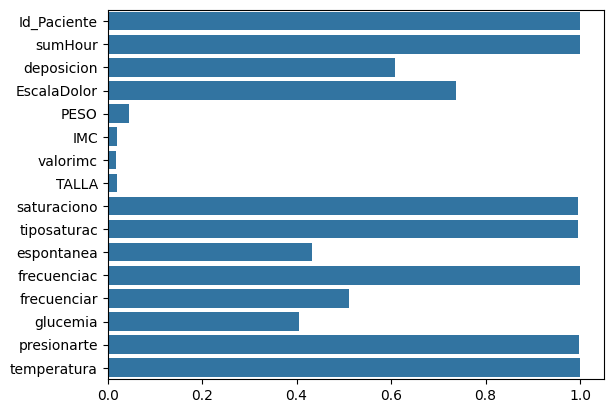

In [19]:
perc=[]
name=[]
for i,column in enumerate(presence.columns.values):
    name.append(column)
    perc.append(sum(presence[column])/len(presence))

ax = sns.barplot(x=perc, y=name)
ax.bar_label(ax.containers[1])
plt.axis('off')
plt.show()

In [20]:
#so this tells us the variables we ought to keep are these
keptvars = [
            "Id_Paciente",
            "sumHour",
            "presionarte",
            "saturaciono",
            "temperatura",
            "tiposaturac",
            # "frecuenciar", #THIS ONE IS THE ONE THAT'S CAUSING THE BIG DROP TO 840 FROM 1650, we can try with and without and see
            "frecuenciac"           
        ]

In [21]:
# presence[keptvars]
presence[keptvars].loc[(presence[keptvars].iloc[:,1:]!=0).all(1)] #check how many we should be getting

,Id_Paciente,sumHour,presionarte,saturaciono,temperatura,tiposaturac,frecuenciac
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
1633,1,1,1,1,1,1,1
1634,1,1,1,1,1,1,1
1635,1,1,1,1,1,1,1
1636,1,1,1,1,1,1,1


In [22]:
#dropping any patients who are missing with empty rows of the aforementioned variables
#probably easier to make a new list than to delete stuff from an older one, so then
trim = []
for i,table in enumerate(clean_ctes):
    n=0
    table = table[keptvars] #dropping all the columns we won't be using
    for label in keptvars:
        if table[label].isnull().all(): #dropping any who dont have all kept variables
            n+=1
    if n < 1:
        trim.append(table)


In [23]:
len(trim)

1633

In [24]:
#sets to categorical and cleans out columns with commas instead of periods
for i,table in enumerate(trim):
    for label in keptvars:
        if label == "tiposaturac":
            trim[i][label] = table[label].astype("category") #can change to something that isnt category if that doesnt work
        else:
            if table[label].dtype == 'object':
                table[label] = table[label].str.replace(',', '.', regex=False)
            trim[i][label] = pd.to_numeric(table[label])

C:\Users\sergi\AppData\Local\Temp\ipykernel_20928\1508908211.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trim[i][label] = pd.to_numeric(table[label])
C:\Users\sergi\AppData\Local\Temp\ipykernel_20928\1508908211.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[label] = table[label].str.replace(',', '.', regex=False)
C:\Users\sergi\AppData\Local\Temp\ipykernel_20928\1508908211.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [25]:
ls = [
    "Aire ambiente",
    "GafasO2",
    "VMK",
    "Optiflow"
]

In [ ]:
#bunch of variables get fixed up here one by one
import warnings
warnings.filterwarnings('ignore')
for i,table in enumerate(trim):
    #check if sumhour filtered minitable has 2 or more rows, meaning it has the presionarte variable in it and isnt empty row
    print(i/len(trim))
    dummies = pd.get_dummies(table[['tiposaturac']].astype(pd.CategoricalDtype(categories=ls)))
    table = pd.concat([table, dummies], axis=1)

    for hour in table["sumHour"].unique():
        ## FIX PRESIONARTE
        if len(table[table["sumHour"]==hour]) >= 2: #if this hour has at least 2 rows
            sys = table[table["sumHour"] == hour]["presionarte"].max()
            dias = table[table["sumHour"] == hour]["presionarte"].min()
            
            trim[i].loc[trim[i]["sumHour"] == hour, "sysPres"] = sys
            trim[i].loc[trim[i]["sumHour"] == hour, "diasPres"] = dias

        ## FIX TIPOSATURAC
        #let's just get rid of the aire one, cuz all it means is the other 2 aren't present
        

        if any(row == True for row in table[table["sumHour"]==hour].tiposaturac_GafasO2):
            trim[i].loc[trim[i]["sumHour"] == hour, "tiposaturac_GafasO2"] = True
        else:
            trim[i].loc[trim[i]["sumHour"] == hour, "tiposaturac_GafasO2"] = False

        if any(row == True for row in table[table["sumHour"]==hour].tiposaturac_VMK):
            trim[i].loc[trim[i]["sumHour"] == hour, "tiposaturac_VMK"] = True
        else:
            trim[i].loc[trim[i]["sumHour"] == hour, "tiposaturac_VMK"] = False

        if any(row == True for row in table[table["sumHour"]==hour].tiposaturac_Optiflow):
            trim[i].loc[trim[i]["sumHour"] == hour, "tiposaturac_Optiflow"] = True
        else:
            trim[i].loc[trim[i]["sumHour"] == hour, "tiposaturac_Optiflow"] = False


        ## FIX INCONSISTENT METRICS (eg. saturaciono)
        # we've already dont the pressure fix by this point, so we could just get an average for every column that's
        # numeric past this point
        if len(table[table["sumHour"]==hour]) >= 2: #if this hour has at least 2 rows
            for col in table[table["sumHour"]==hour].columns.values:
                if table[col].dtype == 'float64':
                    # print(i)
                    trim[i].loc[trim[i]["sumHour"] == hour, col] = trim[i].loc[trim[i]["sumHour"] == hour, col].mean() #should work??







0.0
0.000612369871402327
0.001224739742804654
0.001837109614206981
0.002449479485609308
0.003061849357011635
0.003674219228413962
0.004286589099816289
0.004898958971218616
0.005511328842620943
0.00612369871402327
0.006736068585425597
0.007348438456827924
0.007960808328230252
0.008573178199632579
0.009185548071034905
0.009797917942437232
0.010410287813839559
0.011022657685241886
0.011635027556644213
0.01224739742804654
0.012859767299448868
0.013472137170851195
0.014084507042253521
0.014696876913655848
0.015309246785058175
0.015921616656460504
0.01653398652786283
0.017146356399265157
0.017758726270667484
0.01837109614206981
0.018983466013472138
0.019595835884874464
0.02020820575627679
0.020820575627679118
0.021432945499081445
0.02204531537048377
0.0226576852418861
0.023270055113288425
0.023882424984690752
0.02449479485609308
0.02510716472749541
0.025719534598897736
0.026331904470300063
0.02694427434170239
0.027556644213104716
0.028169014084507043
0.02878138395590937
0.029393753827311696


In [27]:
trim[0]

,Id_Paciente,sumHour,presionarte,saturaciono,temperatura,tiposaturac,frecuenciac,sysPres,diasPres,tiposaturac_GafasO2,tiposaturac_VMK,tiposaturac_Optiflow
0,14260524,14,79.0,96.0,37.2,VMK,110.0,144.0,79.0,False,True,False
1,14260524,14,144.0,96.0,37.2,VMK,110.0,144.0,79.0,False,True,False
2,14260524,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
3,14260524,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
4,14260524,17,NaN,97.0,37.8,VMK,110.0,NaN,NaN,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
334,14260524,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
335,14260524,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
336,14260524,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
337,14260524,249,84.0,95.0,36.9,GafasO2,100.0,130.0,84.0,True,False,False


In [29]:
# backup2 = copy.deepcopy(trim)

In [39]:
for i,table in enumerate(trim): #cleanup stuff
    if "presionarte" in table.columns.values:
        trim[i] = table.drop("presionarte",axis=1)
    if "tiposaturac" in table.columns.values:
        trim[i] = trim[i].drop("tiposaturac",axis=1)
    trim[i] = trim[i].drop_duplicates()

In [43]:
trim[500]

,Id_Paciente,sumHour,saturaciono,temperatura,frecuenciac,sysPres,diasPres,tiposaturac_GafasO2,tiposaturac_VMK,tiposaturac_Optiflow
0,892394708,18,98.0,37.0,53.0,115.0,70.0,True,False,False
2,892394708,19,NaN,NaN,NaN,NaN,NaN,False,False,False
3,892394708,20,NaN,37.4,NaN,NaN,NaN,False,False,False
4,892394708,21,NaN,NaN,NaN,NaN,NaN,False,False,False
5,892394708,22,NaN,NaN,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...
767,892394708,653,NaN,NaN,NaN,NaN,NaN,False,False,False
768,892394708,654,NaN,NaN,NaN,NaN,NaN,False,False,False
769,892394708,655,NaN,NaN,NaN,NaN,NaN,False,False,False
770,892394708,656,NaN,37.2,NaN,NaN,NaN,False,False,False


In [41]:
# clean=pd.concat(clean_ctes) #not really necessary, i think, since we can make the summary_tables from the isolated ones in clean_ctes methinks?
t_concat=pd.concat(trim)

In [42]:
t_concat

,Id_Paciente,sumHour,saturaciono,temperatura,frecuenciac,sysPres,diasPres,tiposaturac_GafasO2,tiposaturac_VMK,tiposaturac_Optiflow
0,14260524,14,96.0,37.2,110.0,144.0,79.0,False,True,False
2,14260524,15,NaN,NaN,NaN,NaN,NaN,False,False,False
3,14260524,16,NaN,NaN,NaN,NaN,NaN,False,False,False
4,14260524,17,97.0,37.8,110.0,NaN,NaN,False,True,False
5,14260524,18,NaN,NaN,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...
231,8631140337,222,NaN,NaN,NaN,NaN,NaN,False,False,False
232,8631140337,223,NaN,NaN,NaN,NaN,NaN,False,False,False
233,8631140337,224,NaN,NaN,NaN,NaN,NaN,False,False,False
234,8631140337,225,96.0,35.7,65.0,110.0,75.0,False,True,False


In [47]:
t_concat.to_excel("trimmed.xlsx")

In [213]:
trim[0].loc[trim[0].sumHour==136]
#i suppose for working with our categorical variable, we could make it whether or not the stronger, mechanical ventilator was ever used during this
#stretch of time
#we could also make it so, for the variables that only appear in some cases, the variable isnt what the metric was but rather was this specific
#metric taken for this patient or not?

,Id_Paciente,sumHour,saturaciono,temperatura,tiposaturac,frecuenciac,sysPres,diasPres
142,14260524,136,93.0,36.6,GafasO2,82.0,112.0,63.0
144,14260524,136,93.0,36.6,VMK,82.0,112.0,63.0
146,14260524,136,95.0,36.6,GafasO2,82.0,112.0,63.0
148,14260524,136,95.0,36.6,VMK,82.0,112.0,63.0


So, i think for the gafas, vmk thing, we just make them onehot variables, since evidently sometimes people have both on at once, and for things like contradicting values in the same hour, just get the average, i guess?

In [208]:
# trim[0].sumHour
import collections
print([item for item, count in collections.Counter(trim[0].sumHour).items() if count > 1])

[92, 136, 154, 160, 178, 233]


In [202]:
#first, a function to get the numbers that mark percentages of a number range
def get_percent(table,percentlist):
    outlist = []
    outlist.append(min(table.sumHour)) #first, set our startpoint as the min hour for this patient
    modhours = table.sumHour - min(table.sumHour) #zero standardize for easier calculations later
    for percent in percentlist: #for each percent requested in this array/list/whatever, get the number that corresponds
        outlist.append(round(max(modhours) * percent)+min(table.sumHour)) #percent fed as decimals, like 0.25
    outlist.append(max(table.sumHour)) #cap off
    return outlist

In [203]:
plist = [0.25,0.5,0.75]

In [204]:
get_percent(trim[0],plist)

[14, 73, 132, 190, 249]

In [64]:
# clean_ctes[32]
clean_ctes[32].to_excel("32.xlsx")  

In [38]:
clean=pd.concat(clean_ctes) #not really necessary, i think, since we can make the summary_tables from the isolated ones in clean_ctes methinks?

In [40]:
clean_ctes[0].to_excel("clean.xlsx")  

In [91]:
clean

,Id_Paciente,sumHour,deposicion,EscalaDolor,PESO,IMC,valorimc,TALLA,cantidadsat,saturaciono,tiposaturac,espontanea,frecuenciac,frecuenciar,glucemia,presionarte,temperatura
0,14260524,14,NaN,NaN,NaN,NaN,NaN,NaN,"0,35",96,VMK,NaN,110,NaN,NaN,79,37.2
1,14260524,14,NaN,NaN,NaN,NaN,NaN,NaN,"0,35",96,VMK,NaN,110,NaN,NaN,144,37.2
2,14260524,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14260524,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14260524,17,NaN,NaN,NaN,NaN,NaN,NaN,"0,35",97,VMK,NaN,110,NaN,NaN,NaN,37.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1350497737,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,NaN,139,36.6
2,1350497737,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,37
3,1350497737,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135,37
0,1382153208,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,NaN,NaN,72,37


In [12]:
ctes_pivot = pd.pivot_table(ctes2,
               values="Valor__form_cte_",
               index="Id_Paciente",
               columns=["Etiqueta__form_cte_","Days","hora"],
               aggfunc="first")

Maybe we should standardize the times here before we go on to stitch them together, so instead of Measurement_Date_Hour_Minute, its standardized to be How much time since entry, or even just to only how many hours since, and we keep it to that.

In [13]:
ctes_pivot.columns = ctes_pivot.columns.to_flat_index()  # Converts MultiIndex to tuples
# ctes_pivot.columns = ['_'.join(col) for col in ctes_pivot.columns]  # Join tuples
ctes_pivot

,"(EscalaDolor, 0 days 00:00:00, 0)","(EscalaDolor, 0 days 00:00:00, 1)","(EscalaDolor, 0 days 00:00:00, 2)","(EscalaDolor, 0 days 00:00:00, 3)","(EscalaDolor, 0 days 00:00:00, 4)","(EscalaDolor, 0 days 00:00:00, 5)","(EscalaDolor, 0 days 00:00:00, 6)","(EscalaDolor, 0 days 00:00:00, 7)","(EscalaDolor, 0 days 00:00:00, 8)","(EscalaDolor, 0 days 00:00:00, 9)",...,"(valorimc, 22 days 00:00:00, 19)","(valorimc, 24 days 00:00:00, 13)","(valorimc, 25 days 00:00:00, 19)","(valorimc, 25 days 00:00:00, 20)","(valorimc, 28 days 00:00:00, 16)","(valorimc, 31 days 00:00:00, 15)","(valorimc, 33 days 00:00:00, 21)","(valorimc, 34 days 00:00:00, 16)","(valorimc, 42 days 00:00:00, 18)","(valorimc, 70 days 00:00:00, 18)"
Id_Paciente,,,,,,,,,,,,,,,,,,,,,
11711053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14260524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14409908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22329353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23608324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245104453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9278045053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9283692237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
joined_1 = pac.join(ctes_pivot, on="Id_Paciente", how="left")
joined_1

,Id_Paciente,Desc_Prueba,Fecha_validaci_n_prueba,Episodio___nico_,Sexo,Edad_a_os__actual_,Fecha__ingreso_,Fecha__alta_,fecha_fallece,dias_hasta_ingreso,...,"(talla (cm), 24 days 00:00:00, 13)","(talla (cm), 25 days 00:00:00, 19)","(talla (cm), 25 days 00:00:00, 20)","(talla (cm), 28 days 00:00:00, 16)","(talla (cm), 31 days 00:00:00, 15)","(talla (cm), 33 days 00:00:00, 21)","(talla (cm), 34 days 00:00:00, 16)","(talla (cm), 42 days 00:00:00, 18)","(talla (cm), 45 days 00:00:00, 18)","(talla (cm), 70 days 00:00:00, 18)"
0,11711053,Coronavirus 2019-nCoV (ARN),2020-03-16,66755125,Hombre,86,2020-03-16,2020-03-21,2020-03-21,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14260524,Coronavirus 2019-nCoV (ARN),2020-04-07,66844681,Mujer,97,2020-04-07,2020-04-17,NaT,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14409908,Coronavirus 2019-nCoV (ARN),2020-03-31,66822847,Mujer,94,2020-04-01,2020-04-04,2020-04-04,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22329353,Coronavirus 2019-nCoV (ARN),2020-09-24,67973760,Mujer,91,2020-10-01,2020-10-09,NaT,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23608324,Coronavirus 2019-nCoV (ARN),2020-03-13,66745194,Hombre,90,2020-03-13,2020-03-21,NaT,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,9245104453,Coronavirus 2019-nCoV (ARN),2021-04-13,69499309,Mujer,50,2021-04-17,2021-04-20,NaT,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1638,9278045053,Coronavirus 2019-nCoV (ARN),2020-03-23,66783136,Mujer,34,2020-03-23,2020-03-26,NaT,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1639,9283692237,Coronavirus-SARS-2 Ag (ICT),2021-01-06,68713110,Mujer,63,2021-01-12,2021-01-19,NaT,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1640,9294732495,Coronavirus 2019-nCoV (ARN),2021-01-19,68769742,Mujer,32,2021-01-19,2021-01-20,NaT,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# joined_1.dtypes
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(joined_1)
categorical_columns

['Desc_Prueba',
 'Sexo',
 ('Cantidad de Sat', Timedelta('0 days 00:00:00'), 0),
 ('Cantidad de Sat', Timedelta('0 days 00:00:00'), 1),
 ('Cantidad de Sat', Timedelta('0 days 00:00:00'), 2),
 ('Cantidad de Sat', Timedelta('0 days 00:00:00'), 3),
 ('Cantidad de Sat', Timedelta('0 days 00:00:00'), 4),
 ('Cantidad de Sat', Timedelta('0 days 00:00:00'), 5),
 ('Cantidad de Sat', Timedelta('0 days 00:00:00'), 6),
 ('Cantidad de Sat', Timedelta('0 days 00:00:00'), 7),
 ('Cantidad de Sat', Timedelta('0 days 00:00:00'), 8),
 ('Cantidad de Sat', Timedelta('0 days 00:00:00'), 9),
 ('Cantidad de Sat', Timedelta('0 days 00:00:00'), 10),
 ('Cantidad de Sat', Timedelta('0 days 00:00:00'), 11),
 ('Cantidad de Sat', Timedelta('0 days 00:00:00'), 12),
 ('Cantidad de Sat', Timedelta('0 days 00:00:00'), 13),
 ('Cantidad de Sat', Timedelta('0 days 00:00:00'), 14),
 ('Cantidad de Sat', Timedelta('0 days 00:00:00'), 15),
 ('Cantidad de Sat', Timedelta('0 days 00:00:00'), 16),
 ('Cantidad de Sat', Timedelta('0